# TG涡

函数 \(a(x, y)\)、\(b(x, y)\)、\(c(x, y)\) 和 \(d(x, y)\) 定义如下：
\begin{align*}
    H(x) &= 
    \begin{cases} 
      \frac{x}{2} & \text{如果 } 0 \leq x \leq \pi \\
      \pi - \frac{x}{2} & \text{如果 } \pi < x \leq 2\pi 
    \end{cases} \\
    a(x, y) &= \cos[H(x)] \cos\left(\frac{\cos(y) (2 - \cos(x))}{\hbar}\right), \\
    b(x, y) &= \cos[H(x)] \sin\left(\frac{\cos(y) (2 - \cos(x))}{\hbar}\right), \\
    c(x, y) &= \sin[H(x)] \cos\left(\frac{\cos(y) (2 + \cos(x))}{\hbar}\right), \\
    d(x, y) &= -\sin[H(x)] \sin\left(\frac{\cos(y) (2 + \cos(x))}{\hbar}\right).
\end{align*}
其中，$\hbar $是一个常数（为了简化，设为1）。

速度场计算
$$
\mathbf{u} = \hbar(a \mathbf \nabla b-b\mathbf \nabla a + c\mathbf \nabla d - d\mathbf \nabla c)
$$

速度场分量 $u_x$ 和 $u_y$ 使用 $a$、$b$、$c$、$d$ 的梯度计算得到：
$$
\begin{align*}
    \nabla a &= \left(\frac{\partial a}{\partial x}, \frac{\partial a}{\partial y}\right), \\
    \nabla b &= \left(\frac{\partial b}{\partial x}, \frac{\partial b}{\partial y}\right), \\
    \nabla c &= \left(\frac{\partial c}{\partial x}, \frac{\partial c}{\partial y}\right), \\
    \nabla d &= \left(\frac{\partial d}{\partial x}, \frac{\partial d}{\partial y}\right).
\end{align*}
$$

速度场的计算公式为：
\begin{align*}
    u_x &= \hbar \left(a \frac{\partial b}{\partial x} - b \frac{\partial a}{\partial x} + c \frac{\partial d}{\partial x} - d \frac{\partial c}{\partial x}\right), \\
    u_y &= \hbar \left(a \frac{\partial b}{\partial y} - b \frac{\partial a}{\partial y} + c \frac{\partial d}{\partial y} - d \frac{\partial c}{\partial y}\right).
\end{align*}

In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# 定义常数
hbar = 1

# 定义 H(x)
def H(x):
    return np.where((0 <= x) & (x <= np.pi), x / 2, np.pi - x / 2)

# 定义函数 a, b, c, d
def a(x, y):
    return np.cos(H(x)) * np.cos(np.cos(y) * (2 - np.cos(x)) / hbar)

def b(x, y):
    return np.cos(H(x)) * np.sin(np.cos(y) * (2 - np.cos(x)) / hbar)

def c(x, y):
    return np.sin(H(x)) * np.cos(np.cos(y) * (2 + np.cos(x)) / hbar)

def d(x, y):
    return -np.sin(H(x)) * np.sin(np.cos(y) * (2 + np.cos(x)) / hbar)

# 计算梯度
def gradient(f, x, y, eps=1e-5):
    f_x = (f(x + eps, y) - f(x - eps, y)) / (2 * eps)
    f_y = (f(x, y + eps) - f(x, y - eps)) / (2 * eps)
    return f_x, f_y



In [4]:
# 计算速度场
def compute_velocity_field_np(x, y, dx, dy):
    # 使用内置的np 求解梯度
    a_val = a(x, y)
    b_val = b(x, y)
    c_val = c(x, y)
    d_val = d(x, y)

    a_grad_x, a_grad_y = np.gradient(a_val, dx, dy)
    b_grad_x, b_grad_y = np.gradient(b_val, dx, dy)
    c_grad_x, c_grad_y = np.gradient(c_val, dx, dy)
    d_grad_x, d_grad_y = np.gradient(d_val, dx, dy)

    u_x = hbar * (a_val * b_grad_x - b_val * a_grad_x + c_val * d_grad_x - d_val * c_grad_x)
    u_y = hbar * (a_val * b_grad_y - b_val * a_grad_y + c_val * d_grad_y - d_val * c_grad_y)

    return u_x, u_y

此处我们设定low像素:   $32\times 32$

设定High像素为    $128\times 128$

In [5]:
size_low = 64
size_High = 256
x_low = np.linspace(0, 2 * np.pi, size_low)
y_low = np.linspace(0, 2 * np.pi, size_low)

x_high = np.linspace(0, 2 * np.pi, size_High)
y_high = np.linspace(0, 2 * np.pi, size_High)


X_low, Y_low = np.meshgrid(x_low, y_low)
X_high, Y_high = np.meshgrid(x_high, y_high)

In [6]:
# 计算函数值
A_low = a(X_low, Y_low)
B_low = b(X_low, Y_low)
C_low = c(X_low, Y_low)
D_low = d(X_low, Y_low)

A_high = a(X_high, Y_high)
B_high = b(X_high, Y_high)
C_high = c(X_high, Y_high)
D_high = d(X_high, Y_high)


In [7]:
# 计算步长
dx_low = x_low[1] - x_low[0]
dy_low = y_low[1] - y_low[0]

dx_high = x_high[1] - x_high[0]
dy_high = y_high[1] - y_high[0]



## 可视化速度场

In [8]:
U_x_low, U_y_low = compute_velocity_field_np(X_low, Y_low, dx_low, dy_low)
U_x_high, U_y_high = compute_velocity_field_np(X_high, Y_high, dx_high, dy_high)

# 计算速度场的大小
U_magnitude_low = np.sqrt(U_x_low**2 + U_y_low**2)
U_magnitude_high = np.sqrt(U_x_high**2 + U_y_high**2)

U_magnitude_low.shape, U_magnitude_high.shape

((64, 64), (256, 256))

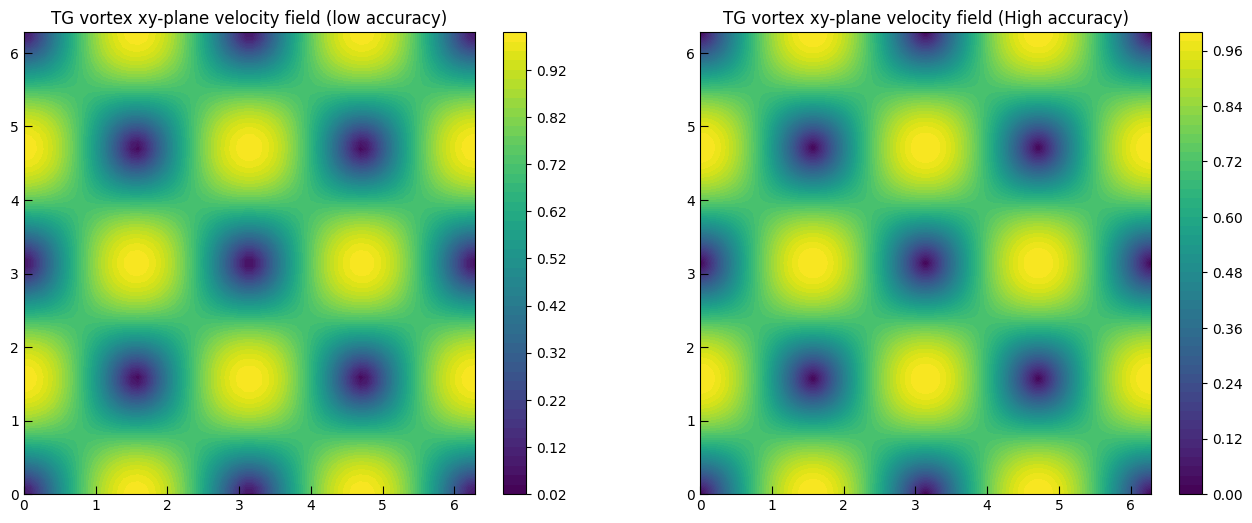

In [9]:
plt.figure(figsize=(16, 6))
plt.subplot(121)
plt.contourf(X_low, Y_low, U_magnitude_low, levels=50, cmap='viridis')
# plt.streamplot(X_low, Y_low, U_x_low, U_y_low, color='white', linewidth=1)
plt.title('TG vortex xy-plane velocity field (low accuracy)')
# plt.streamplot(X, Y, U_x_FD, U_y_FD, color='white', linewidth=1)
plt.xlim(0, 2 * np.pi)
plt.ylim(0, 2 * np.pi)

plt.tick_params(axis='both', direction='in', length=6)
plt.colorbar()



plt.subplot(122)
plt.contourf(X_high, Y_high, U_magnitude_high, levels=50, cmap='viridis')
# plt.streamplot(X_high, Y_high, U_x_high, U_y_high, color='white', linewidth=1)
plt.title('TG vortex xy-plane velocity field (High accuracy)')
# plt.streamplot(X, Y, U_x_FD, U_y_FD, color='white', linewidth=1)
plt.xlim(0, 2 * np.pi)
plt.ylim(0, 2 * np.pi)

plt.tick_params(axis='both', direction='in', length=6)
plt.colorbar()

plt.show()




## 可视化涡度场

In [10]:
def vorticity(U_x, U_y, dx, dy):
    dU_y_dx, _ = np.gradient(U_y, dx, axis=0), np.gradient(U_y, dy, axis=1)
    _, dU_x_dy = np.gradient(U_x, dx, axis=0), np.gradient(U_x, dy, axis=1)
    return dU_y_dx - dU_x_dy

In [11]:
# 计算旋度
vort_low = vorticity(U_x_low, U_y_low, dx_low, dy_low)
vort_high = vorticity(U_x_high, U_y_high, dx_high, dy_high)


# 归一化旋度
max_vort_low = np.max(np.abs(vort_low))
vort_normalized_low = vort_low / max_vort_low if max_vort_low != 0 else vort_low

max_vort_high = np.max(np.abs(vort_high))
vort_normalized_high = vort_high / max_vort_high if max_vort_high != 0 else vort_high



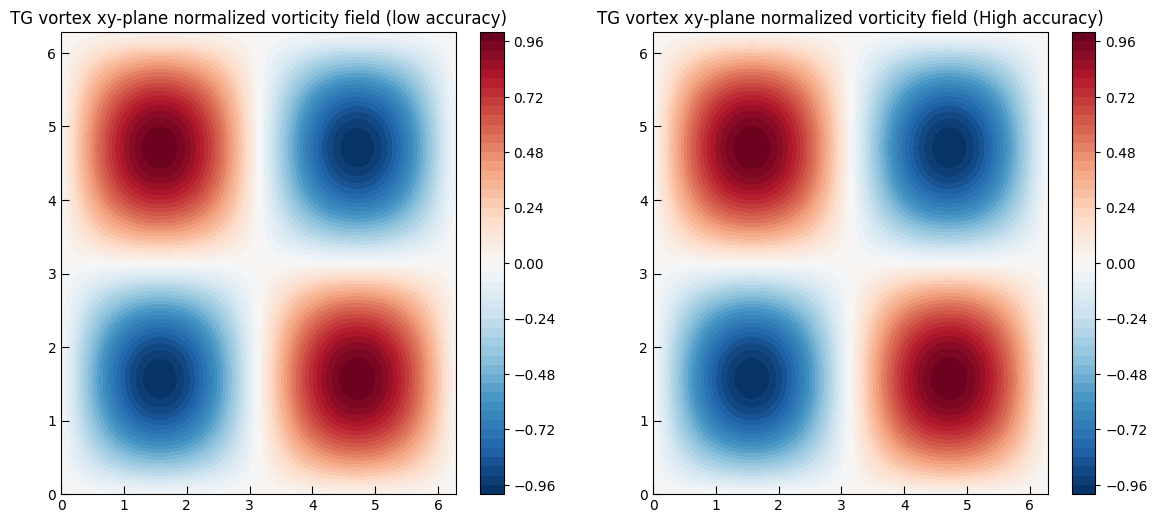

In [12]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
plt.contourf(X_low, Y_low, vort_normalized_low, levels=50, cmap='RdBu_r', vmin=-1, vmax=1)
plt.colorbar()
plt.title('TG vortex xy-plane normalized vorticity field (low accuracy)')
plt.tick_params(axis='both', direction='in', length=6)

plt.subplot(122)
plt.contourf(X_high, Y_high, vort_normalized_high, levels=50, cmap='RdBu_r', vmin=-1, vmax=1)
plt.colorbar()
plt.title('TG vortex xy-plane normalized vorticity field (High accuracy)')


plt.tick_params(axis='both', direction='in', length=6)


plt.show()



## 特征提取阶段


从速度场得到abcd

In [13]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset, random_split

In [14]:
import os
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

### 数据处理

In [15]:
# 将数据转换为PyTorch张量
U_x = torch.tensor(U_x_low, dtype=torch.float32).unsqueeze(0).unsqueeze(0)  # 增加batch和channel维度
U_y = torch.tensor(U_y_low, dtype=torch.float32).unsqueeze(0).unsqueeze(0)
U_magnitude = torch.tensor(U_magnitude_low, dtype=torch.float32).unsqueeze(0).unsqueeze(0)

# 合并速度场作为输入
velocity_field = torch.cat((U_x, U_y, U_magnitude), dim=1)

# 目标abcd (假设为0初始化)
target_abcd = torch.zeros((1, 4, size_low, size_low), dtype=torch.float32)

# 创建数据集和数据加载器
dataset = TensorDataset(velocity_field, target_abcd)
dataloader = DataLoader(dataset, batch_size=500, shuffle=True)

In [16]:
U_magnitude.shape,target_abcd.shape

(torch.Size([1, 1, 64, 64]), torch.Size([1, 4, 64, 64]))

### 构建模型

In [17]:
class BasicModelA(nn.Module):
    def __init__(self):
        super(BasicModelA, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(128)
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(256)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv4 = nn.Conv2d(256, 512, kernel_size=3, padding=1)
        self.bn4 = nn.BatchNorm2d(512)
        self.upsample = nn.Upsample(scale_factor=8, mode='bilinear', align_corners=True)
        self.conv5 = nn.Conv2d(512, 4, kernel_size=3, padding=1)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.pool(x)
        x = F.relu(self.bn2(self.conv2(x)))
        x = self.pool(x)
        x = F.relu(self.bn3(self.conv3(x)))
        x = self.pool(x)
        x = F.relu(self.bn4(self.conv4(x)))
        x = self.upsample(x)  # 使用上采样恢复到原始尺寸
        x = self.conv5(x)
        return x

In [18]:
class ConstraintLayer(nn.Module):
    def __init__(self):
        super(ConstraintLayer, self).__init__()

    def forward(self, x):
        # 假设x的形状为 [batch_size, 4, height, width]，其中4代表abcd
        norm = torch.sqrt(x[:, 0, :, :]**2 + x[:, 1, :, :]**2 + x[:, 2, :, :]**2 + x[:, 3, :, :]**2 + 1e-8)
        norm = norm.unsqueeze(1)  # 为了与abcd的四个通道对齐
        x = x / norm  # 归一化
        return x


In [19]:
 
class ModelAWithConstraints(nn.Module):
    def __init__(self):
        super(ModelAWithConstraints, self).__init__()
        self.model = BasicModelA()
        self.constraint_layer = ConstraintLayer()

    def forward(self, x):
        x = self.model(x)
        x = self.constraint_layer(x)
        return x

### 定义Loss function

In [20]:
def calculate_gradients_with_numpy(tensor):
    # 确保 Tensor 不需要梯度跟踪，且在 CPU 上
    tensor_np = tensor.detach().cpu().numpy()

   
    # 计算梯度
    grad_x = np.gradient(tensor_np, axis=1)  # 假设水平方向是 axis=1
    grad_y = np.gradient(tensor_np, axis=2)  # 假设垂直方向是 axis=2
    
    # 转换回 Tensor
    grad_x_tensor = torch.from_numpy(grad_x).to(tensor.device)
    grad_y_tensor = torch.from_numpy(grad_y).to(tensor.device)
    
    return grad_x_tensor, grad_y_tensor


In [21]:
def laplacian_2d(array, dx, dy):
    grad_x = np.gradient(array, dx, axis=1, edge_order=2)  # 计算 x 方向的一阶导数
    grad_y = np.gradient(array, dy, axis=0, edge_order=2)  # 计算 y 方向的一阶导数
    
    laplacian_x = np.gradient(grad_x, dx, axis=1, edge_order=2)  # 计算 x 方向的二阶导数
    laplacian_y = np.gradient(grad_y, dy, axis=0, edge_order=2)  # 计算 y 方向的二阶导数
    
    return laplacian_x + laplacian_y


def laplacian_2d_torch(tensor, dx, dy):
    # 确保tensor是浮点类型，因为梯度计算通常需要浮点运算
    tensor = tensor.float()
    tensor_np = tensor.detach().cpu().numpy()

    # 计算x和y方向的一阶导数
    grad_x = np.gradient(tensor_np, axis=1)  # x方向
    grad_y = np.gradient(tensor_np, axis=2)  # y方向

    # 计算x和y方向的二阶导数
    laplacian_x = np.gradient(grad_x, axis=1)
    laplacian_y = np.gradient(grad_y, axis=2)

    laplacian_x_tensor = torch.from_numpy(laplacian_x).to(tensor.device)
    laplacian_y_tensor = torch.from_numpy(laplacian_y).to(tensor.device)

    # 相加得到完整的拉普拉斯算子
    laplacian = laplacian_x_tensor + laplacian_y_tensor

    return laplacian



In [22]:
# 定义损失函数
# 这个 loss function 考虑了数学和物理约束
def loss_function(predicted_abcd, true_velocity, epsilon):
    # 提取 a, b, c, d
    # 提取 a, b, c, d，并增加批次维度以兼容梯度计算
    a = predicted_abcd[:, 0, :, :]
    b = predicted_abcd[:, 1, :, :]
    c = predicted_abcd[:, 2, :, :]
    d = predicted_abcd[:, 3, :, :]
    # print(a.shape)
    
    # 计算梯度
    a_grad_x, a_grad_y = calculate_gradients_with_numpy(a)
    b_grad_x, b_grad_y = calculate_gradients_with_numpy(b)
    c_grad_x, c_grad_y = calculate_gradients_with_numpy(c)
    d_grad_x, d_grad_y = calculate_gradients_with_numpy(d)

    hbar = 1  # 你可以根据具体情况调整这个参数


        # 根据 a, b, c, d 计算预测的速度场
    U_x_pred = a + b
    U_y_pred = c + d
    U_magnitude_pred = torch.sqrt(U_x_pred**2 + U_y_pred**2)
    
    # 计算速度场的损失
    U_x_true = true_velocity[:, 0, :, :]
    U_y_true = true_velocity[:, 1, :, :]
    U_magnitude_true = true_velocity[:, 2, :, :]


    # U_x_pred = hbar * (a * b_grad_x - b * a_grad_x + c * d_grad_x - d * c_grad_x)
    # U_y_pred = hbar * (a * b_grad_y - b * a_grad_y + c * d_grad_y - d * c_grad_y)
    # U_magnitude_pred = torch.sqrt(U_x_pred**2 + U_y_pred**2)
    
    # # # 计算速度场的损失
    # U_x_true = true_velocity[:, 0, :, :]
    # U_y_true = true_velocity[:, 1, :, :]
    # U_magnitude_true = true_velocity[:, 2, :, :]


    loss_velocity =  F.mse_loss(U_magnitude_pred, U_magnitude_true)+F.mse_loss(U_x_pred, U_x_true) + F.mse_loss(U_y_pred, U_y_true) 
    
    # 计算归一化约束
    # psi1 = a + 1j * b
    # psi2 = c + 1j * d
    norm = a**2 + b**2 + c**2 + d**2

    
    norm_constraint = F.mse_loss(norm, torch.ones_like(norm))
    
    #     # 计算拉普拉斯算子
    lap_b = laplacian_2d_torch(b, dx_low,dy_low)
    lap_a = laplacian_2d_torch(a, dx_low,dy_low)
    lap_d = laplacian_2d_torch(d, dx_low,dy_low)
    lap_c = laplacian_2d_torch(c, dx_low,dy_low)

    # # 计算螺旋度约束

    curl_constraint = (a * lap_b - b * lap_a + c * lap_d - d * lap_c).sum()
    
    # # 计算正则化项
    regularization_term = epsilon * 0.25*(torch.sum(a**2) + torch.sum(b**2) + torch.sum(c**2) + torch.sum(d**2))
    
    # # 总损失
    total_loss = loss_velocity #+ norm_constraint + curl_constraint #+ regularization_term 
    return total_loss

### 设置超参数

In [23]:
# 超参数
learning_rate = 0.001
num_epochs = 5000
epsilon = 0.01

channels = 3

# 创建模型和优化器
model = ModelAWithConstraints()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


In [24]:
def plot_comparison(predicted, actual, step):
    
    a = predicted_abcd[:, 0, :, :]
    b = predicted_abcd[:, 1, :, :]
    c = predicted_abcd[:, 2, :, :]
    d = predicted_abcd[:, 3, :, :]
    
    a_grad_x, a_grad_y = calculate_gradients_with_numpy(a)
    b_grad_x, b_grad_y = calculate_gradients_with_numpy(b)
    c_grad_x, c_grad_y = calculate_gradients_with_numpy(c)
    d_grad_x, d_grad_y = calculate_gradients_with_numpy(d)

    hbar = 1

    U_x_pred = hbar * (a * b_grad_x - b * a_grad_x + c * d_grad_x - d * c_grad_x)
    U_y_pred = hbar * (a * b_grad_y - b * a_grad_y + c * d_grad_y - d * c_grad_y)
    U_magnitude_pred = torch.sqrt(U_x_pred**2 + U_y_pred**2)

    
    
    plt.subplots(2, 3, figsize=(10, 8))

    plt.subplot(2, 3, 1)
    plt.imshow(U_magnitude_pred[0].detach().cpu().numpy(), cmap='viridis')

    plt.title('Predicted Magnitude')

    plt.subplot(2, 3, 2)
    plt.imshow(U_x_pred[0].detach().cpu().numpy(), cmap='viridis')
    plt.title('Predicted U_x')

    plt.subplot(2, 3, 3)
    plt.imshow(U_y_pred[0].detach().cpu().numpy(), cmap='viridis')
    plt.title('Predicted U_y')

    plt.subplot(2, 3, 4)
    plt.imshow(actual[0,2].detach().cpu().numpy(), cmap='viridis')
    plt.title('Actual Magnitude')

    plt.subplot(2, 3, 5)
    plt.imshow(actual[0,1].detach().cpu().numpy(), cmap='viridis'   )
    plt.title('Actual U_x')

    plt.subplot(2, 3, 6)
    plt.imshow(actual[0,0].detach().cpu().numpy(), cmap='viridis')
    plt.title('Actual U_y')

    plt.suptitle(f'Step {step}')
    plt.show()


In [25]:
# 训练模型
for epoch in range(num_epochs):
    for i, (velocity, _) in enumerate(dataloader):
        optimizer.zero_grad()
        predicted_abcd = model(velocity)
        loss = loss_function(predicted_abcd, velocity, epsilon)
        loss.backward()
        optimizer.step()
        if i % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}], Loss: {loss.item():.4f}')



Epoch [1/5000], Step [1], Loss: 1.6488
Epoch [2/5000], Step [1], Loss: 0.7899
Epoch [3/5000], Step [1], Loss: 0.5423
Epoch [4/5000], Step [1], Loss: 0.3510
Epoch [5/5000], Step [1], Loss: 0.2034
Epoch [6/5000], Step [1], Loss: 0.1159
Epoch [7/5000], Step [1], Loss: 0.0855
Epoch [8/5000], Step [1], Loss: 0.0851
Epoch [9/5000], Step [1], Loss: 0.0928
Epoch [10/5000], Step [1], Loss: 0.0984
Epoch [11/5000], Step [1], Loss: 0.0989
Epoch [12/5000], Step [1], Loss: 0.0944
Epoch [13/5000], Step [1], Loss: 0.0864
Epoch [14/5000], Step [1], Loss: 0.0767
Epoch [15/5000], Step [1], Loss: 0.0667
Epoch [16/5000], Step [1], Loss: 0.0574
Epoch [17/5000], Step [1], Loss: 0.0495
Epoch [18/5000], Step [1], Loss: 0.0432
Epoch [19/5000], Step [1], Loss: 0.0385
Epoch [20/5000], Step [1], Loss: 0.0354
Epoch [21/5000], Step [1], Loss: 0.0334
Epoch [22/5000], Step [1], Loss: 0.0321
Epoch [23/5000], Step [1], Loss: 0.0311
Epoch [24/5000], Step [1], Loss: 0.0302
Epoch [25/5000], Step [1], Loss: 0.0292
Epoch [26

In [26]:
# 测试数据生成
U_x_test, U_y_test = compute_velocity_field_np(X_low, Y_low, dx_low, dy_low)
U_magnitude_test = np.sqrt(U_x_test**2 + U_y_test**2)

# 将测试数据转换为PyTorch张量
U_x_test = torch.tensor(U_x_test, dtype=torch.float32).unsqueeze(0).unsqueeze(0)
U_y_test = torch.tensor(U_y_test, dtype=torch.float32).unsqueeze(0).unsqueeze(0)
U_magnitude_test = torch.tensor(U_magnitude_test, dtype=torch.float32).unsqueeze(0).unsqueeze(0)

# 合并测试速度场作为输入
velocity_field_test = torch.cat((U_x_test, U_y_test, U_magnitude_test), dim=1)

# 将模型设置为评估模式
model.eval()

# 使用测试数据进行预测
with torch.no_grad():
    predicted_abcd_test = model(velocity_field_test)

# 打印预测结果
print("Predicted a, b, c, d:")
print(predicted_abcd_test)

# 计算预测的速度场
a_test = predicted_abcd_test[:, 0, :, :].squeeze().numpy()
b_test = predicted_abcd_test[:, 1, :, :].squeeze().numpy()
c_test = predicted_abcd_test[:, 2, :, :].squeeze().numpy()
d_test = predicted_abcd_test[:, 3, :, :].squeeze().numpy()

U_x_pred_test = a_test + b_test
U_y_pred_test = c_test + d_test
U_magnitude_pred_test = np.sqrt(U_x_pred_test**2 + U_y_pred_test**2)

Predicted a, b, c, d:
tensor([[[[ 6.7297e-01,  6.7468e-01,  6.7422e-01,  ...,  5.6150e-01,
            5.7664e-01,  5.8163e-01],
          [ 6.5410e-01,  6.5090e-01,  6.5010e-01,  ...,  5.2735e-01,
            5.4396e-01,  5.5388e-01],
          [ 6.0328e-01,  6.0173e-01,  6.0080e-01,  ...,  4.5386e-01,
            4.7217e-01,  4.8210e-01],
          ...,
          [ 7.5182e-01,  7.3176e-01,  7.0609e-01,  ...,  7.9166e-01,
            7.9945e-01,  7.9965e-01],
          [ 7.1884e-01,  7.0101e-01,  6.7907e-01,  ...,  7.5109e-01,
            7.5664e-01,  7.5443e-01],
          [ 6.9935e-01,  6.8295e-01,  6.6173e-01,  ...,  7.2643e-01,
            7.3019e-01,  7.2988e-01]],

         [[-7.1761e-01, -7.2017e-01, -7.1813e-01,  ..., -6.0405e-01,
           -6.2073e-01, -6.3175e-01],
          [-7.4737e-01, -7.4690e-01, -7.4393e-01,  ..., -6.1923e-01,
           -6.3905e-01, -6.4998e-01],
          [-7.9431e-01, -7.9279e-01, -7.8772e-01,  ..., -6.3896e-01,
           -6.6335e-01, -6.7505e-01]

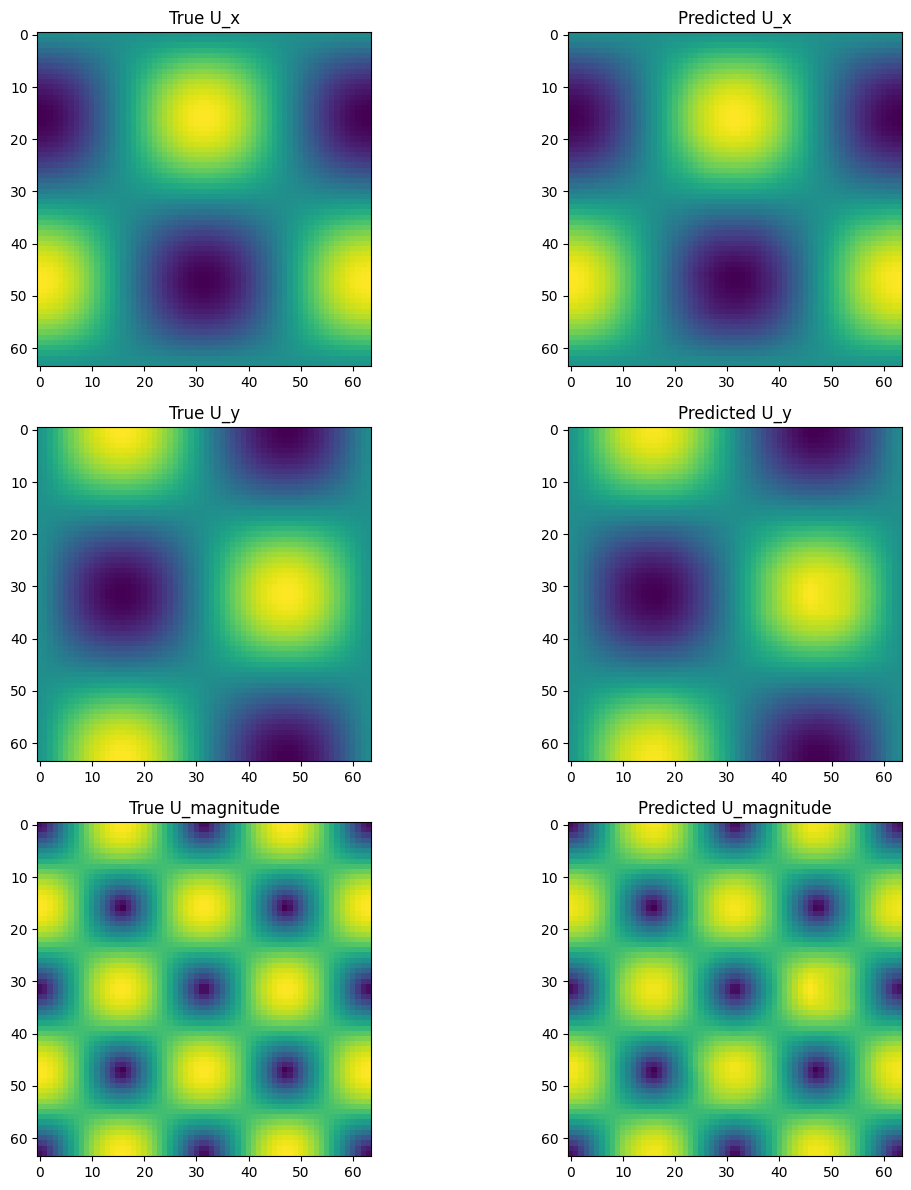

In [27]:
# 绘图
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

# U_x
axes[0, 0].imshow(U_x_test.squeeze().numpy(), cmap='viridis')
axes[0, 0].set_title('True U_x')
axes[0, 1].imshow(U_x_pred_test, cmap='viridis')
axes[0, 1].set_title('Predicted U_x')

# U_y
axes[1, 0].imshow(U_y_test.squeeze().numpy(), cmap='viridis')
axes[1, 0].set_title('True U_y')
axes[1, 1].imshow(U_y_pred_test, cmap='viridis')
axes[1, 1].set_title('Predicted U_y')

# U_magnitude
axes[2, 0].imshow(U_magnitude_test.squeeze().numpy(), cmap='viridis')
axes[2, 0].set_title('True U_magnitude')
axes[2, 1].imshow(U_magnitude_pred_test, cmap='viridis')
axes[2, 1].set_title('Predicted U_magnitude')

plt.tight_layout()
plt.show()


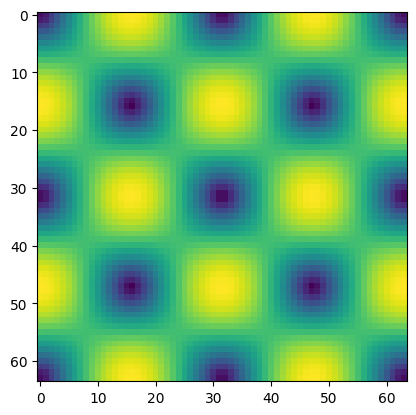

In [36]:
plt.imshow(U_magnitude_test.squeeze().numpy(), cmap='viridis')
plt.savefig('U_x_pred_test.png')

In [45]:
U_magnitude_high.shape

(256, 256)

256

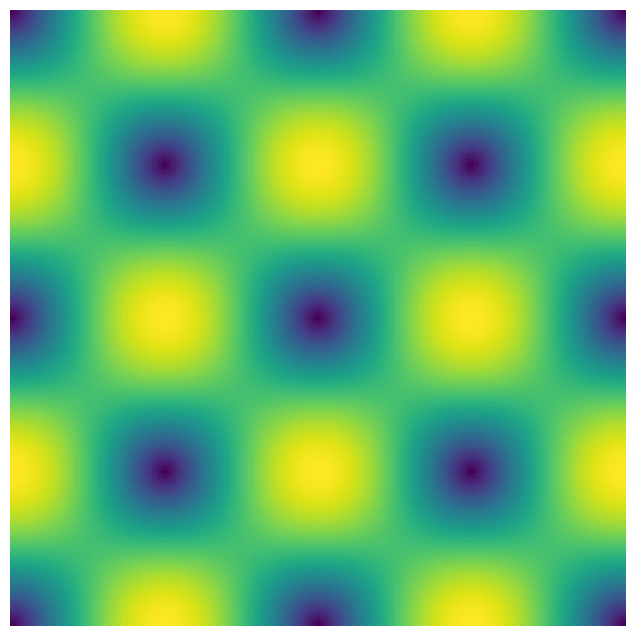

In [47]:
plt.figure(figsize=(8, 8))
plt.imshow(U_magnitude_high, cmap='viridis', interpolation='nearest')
plt.axis('off')  # 隐藏坐标轴

# 保存图像
plt.savefig('velocity_magnitude_256x256.png', bbox_inches='tight', pad_inches=0, dpi=300)
plt.show()

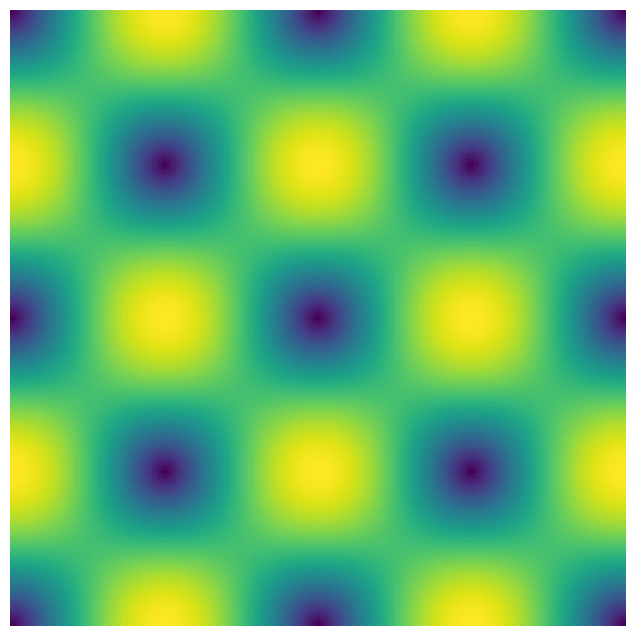

In [62]:
import matplotlib.pyplot as plt
from PIL import Image
import os

# 假设 U_magnitude_high 是 (256, 256) 形状的图像数据
plt.figure(figsize=(8, 8))  # 设置图像显示大小
plt.imshow(U_magnitude_high, cmap='viridis', interpolation='nearest')
plt.axis('off')  # 隐藏坐标轴

# 保存为临时文件
temp_filename = 'temp_velocity_magnitude_256x256.png'
plt.savefig(temp_filename, bbox_inches='tight', pad_inches=0, dpi=300, format='png')

# 使用 PIL 去掉 alpha 通道
img = Image.open(temp_filename)
img = img.convert('RGB')  # 转换为 RGB 模式，去掉 alpha 通道
img.save('velocity_magnitude_256x256.png', format='png')

# 清理临时文件
os.remove(temp_filename)

# 显示图像
plt.show()


In [51]:
U_magnitude_test64 = U_magnitude_test.squeeze().numpy().copy()

In [52]:
U_magnitude_test64

array([[0.07041945, 0.11096729, 0.20350367, ..., 0.20350367, 0.11096729,
        0.07041945],
       [0.11105035, 0.13978752, 0.21939544, ..., 0.21939544, 0.13978752,
        0.11105035],
       [0.20372783, 0.21956132, 0.27402085, ..., 0.27402085, 0.21956132,
        0.20372783],
       ...,
       [0.20372783, 0.21956132, 0.27402085, ..., 0.27402085, 0.21956132,
        0.20372783],
       [0.11105035, 0.13978752, 0.21939544, ..., 0.21939544, 0.13978752,
        0.11105035],
       [0.07041945, 0.11096729, 0.20350367, ..., 0.20350367, 0.11096729,
        0.07041945]], dtype=float32)

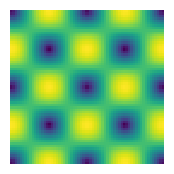

In [57]:
plt.figure(figsize=(2, 2))
plt.imshow(U_magnitude_test64, cmap='viridis', interpolation='nearest')
plt.axis('off')  # 隐藏坐标轴

# 保存图像
plt.savefig('velocity_magnitude_64x64.png', bbox_inches='tight', pad_inches=0, dpi=300, format='png')

plt.show()

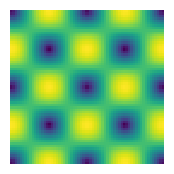

In [61]:
import matplotlib.pyplot as plt
from PIL import Image

# 假设 U_magnitude_test64 是 (64, 64) 形状的图像数据
plt.figure(figsize=(2, 2))  # 设置图像显示大小
plt.imshow(U_magnitude_test64, cmap='viridis', interpolation='nearest')
plt.axis('off')  # 隐藏坐标轴

# 保存为临时文件
temp_filename = 'temp_velocity_magnitude_64x64.png'
plt.savefig(temp_filename, bbox_inches='tight', pad_inches=0, dpi=300, format='png')

# 使用 PIL 去掉 alpha 通道
img = Image.open(temp_filename)
img = img.convert('RGB')  # 转换为 RGB 模式，去掉 alpha 通道
img.save('velocity_magnitude_64x64.png', format='png')

# 清理临时文件
import os
os.remove(temp_filename)

# 显示图像
plt.show()


In [41]:
U_magnitude_high.shape

(256, 256)

In [63]:
print(U_magnitude_test64.shape)  # 打印形状
print(U_magnitude_high.shape)  # 打印形状

(64, 64)
(256, 256)
